In [1]:
import pandas as pd

In [2]:
import pandas as pd
import glob
import os

# Find all files ending with _metrics.csv in ../Results
files = glob.glob("Results_trainedbaseline/Predictions*_*_metrics.csv")

# Option 1: Load into a dictionary (keep separate)
dfs = {os.path.basename(f): pd.read_csv(f) for f in files}

# Example: access one file
# dfs["experiment1_metrics.csv"].head()

# Option 2: Concatenate into one dataframe (add filename column)
all_metrics = []
for f in files:
    df = pd.read_csv(f)
    df["source_file"] = os.path.basename(f)  # keep track of origin
    all_metrics.append(df)

all_metrics_df = pd.concat(all_metrics, ignore_index=True)

# Now you have all results in one dataframe
all_metrics_df.head()


,Fold_no,Accuracy,F1 Score,Precision,Recall,Specificity,PR AUC,ROC AUC,Model_name,TN,TP,FP,FN,source_file
0,Fold 1,0.011834,0.022339,0.011296,1.0,0.000550,0.039710,0.728615,LogisticRegression,4,83,7265,0,PredictionsLogisticRegression_sqr_proteins_cox...
1,Fold 2,0.012922,0.022363,0.011308,1.0,0.001651,0.030015,0.709055,LogisticRegression,12,83,7257,0,PredictionsLogisticRegression_sqr_proteins_cox...
2,Fold 3,0.012106,0.022345,0.011299,1.0,0.000825,0.022716,0.663643,LogisticRegression,6,83,7263,0,PredictionsLogisticRegression_sqr_proteins_cox...
3,Fold 4,0.011971,0.022082,0.011164,1.0,0.000825,0.025026,0.667407,LogisticRegression,6,82,7263,0,PredictionsLogisticRegression_sqr_proteins_cox...
4,Fold 5,0.011699,0.022339,0.011296,1.0,0.000413,0.021971,0.655396,LogisticRegression,3,83,7265,0,PredictionsLogisticRegression_sqr_proteins_cox...


In [3]:
all_metrics_df.groupby(["source_file"]).mean().sort_values(by=["PR AUC"])

/var/tmp/pbs.1547647.pbs/ipykernel_4174526/423941617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_metrics_df.groupby(["source_file"]).mean().sort_values(by=["PR AUC"])


,Accuracy,F1 Score,Precision,Recall,Specificity,PR AUC,ROC AUC,TN,TP,FP,FN
source_file,,,,,,,,,,,
PredictionsRandomForest_sqr_proteins_cox_specificPD_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.011263,0.022275,0.011263,1.000000,0.000000,0.011567,0.508400,0.0,82.8,7268.8,0.0
PredictionsRUSBoost_proteins_cox_specificPD_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.853666,0.034282,0.018597,0.229533,0.860776,0.013912,0.559422,6256.8,19.0,1012.0,63.8
PredictionsRandomForest_balanced_proteins_matched_prodromals_PD_HC_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.626856,0.035745,0.018409,0.613429,0.627008,0.016659,0.636738,4557.6,50.8,2711.2,32.0
PredictionsRandomForest_subsample_PredictionsLASSORegression_proteins_cox_PD_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.627074,0.035765,0.018420,0.613429,0.627229,0.017352,0.641828,4559.2,50.8,2709.6,32.0
PredictionsRandomForest_subsample_proteins_cox_PD_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.627074,0.035765,0.018420,0.613429,0.627229,0.017352,0.641828,4559.2,50.8,2709.6,32.0
...,...,...,...,...,...,...,...,...,...,...,...
PredictionsLASSORegression_proteins_matched_all_PD_HC_unique_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.720523,0.049582,0.025778,0.647429,0.721357,0.036746,0.744061,5243.4,53.6,2025.4,29.2
PredictionsLogisticRegression_proteins_matched_all_PD_HC_unique_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.717830,0.049130,0.025534,0.647429,0.718633,0.036827,0.744509,5223.6,53.6,2045.2,29.2
PredictionsLogisticRegression_PredictionsLASSORegression_proteins_matched_all_PD_HC_unique_SIMPLEMEDIAN_recall_Training_all_prodromals_specificfeatures_SIMPLEMEDIAN_recall_Training_all_prodromals_metrics.csv,0.717830,0.049130,0.025534,0.647429,0.718633,0.036827,0.744509,5223.6,53.6,2045.2,29.2


In [4]:
# Group by 'source_file' and take the mean
grouped_means = all_metrics_df.groupby("source_file").mean()

# Filter based on the mean values
filtered_df = grouped_means[
    (grouped_means["Specificity"] > 0.6) &
    (grouped_means["Recall"] > 0.6)
]


/var/tmp/pbs.1547647.pbs/ipykernel_4174526/3095755330.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = all_metrics_df.groupby("source_file").mean()


In [5]:
source_list = filtered_df.reset_index()["source_file"].tolist()

In [6]:
filtered_df = all_metrics_df[all_metrics_df["source_file"].isin(source_list)]

In [7]:
filtered_df.groupby("source_file").mean()["Recall"].max()

/var/tmp/pbs.1547647.pbs/ipykernel_4174526/1020260216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby("source_file").mean()["Recall"].max()


0.6498971495739053

In [8]:
filtered_df["Recall"].max()

0.7469879518072289

In [9]:
filtered_df.groupby("source_file").mean()["PR AUC"].max()

/var/tmp/pbs.1547647.pbs/ipykernel_4174526/3295057391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby("source_file").mean()["PR AUC"].max()


0.03723518506280288

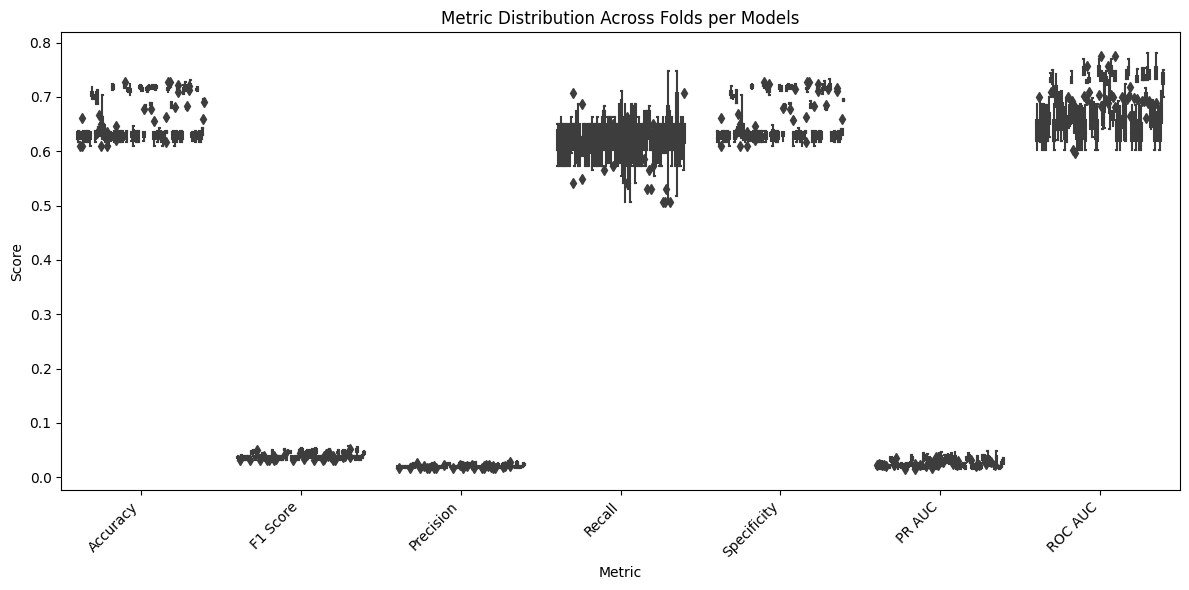

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Keep only numeric columns + source_file
numeric_cols = filtered_df.select_dtypes(include="number").columns.tolist()
metrics = [c for c in numeric_cols if c not in ["TN", "TP", "FP", "FN"]]

# Melt into long format
melted = filtered_df.melt(
    id_vars=["source_file"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
)

# Ensure numeric type
melted["value"] = pd.to_numeric(melted["value"], errors="coerce")

# Drop NaNs (just in case)
melted = melted.dropna(subset=["value"])

# Choose a palette with more colors
unique_sources = melted["source_file"].nunique()
palette = sns.color_palette("tab20", n_colors=unique_sources)

# Plot: distribution of metrics across folds and source files
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=melted,
    x="metric", y="value",
    hue="source_file",
    palette=palette
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.title("Metric Distribution Across Folds per Models")

# Remove legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


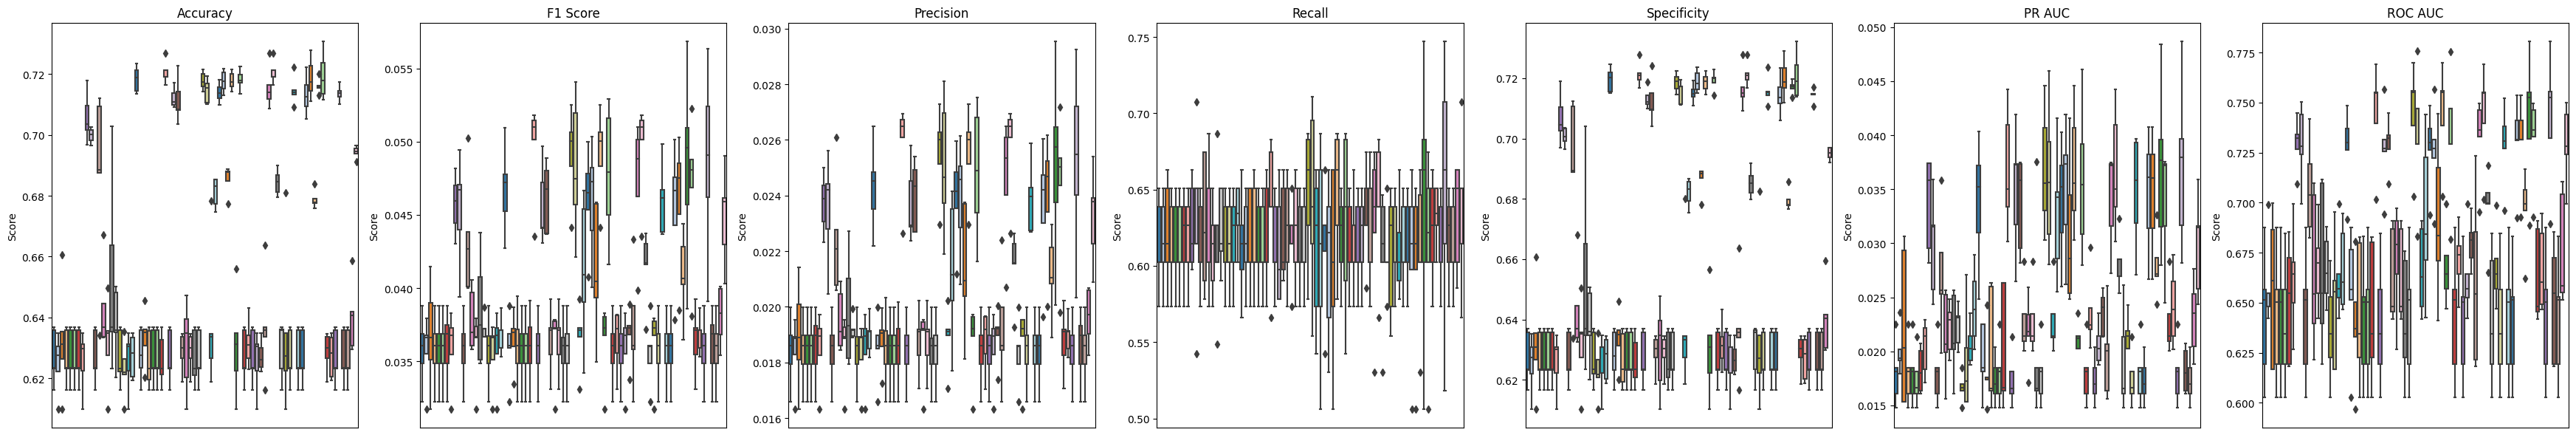

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Keep only numeric columns + source_file
numeric_cols = filtered_df.select_dtypes(include="number").columns.tolist()
metrics = [c for c in numeric_cols if c not in ["TN", "TP", "FP", "FN"]]

# Melt into long format
melted = filtered_df.melt(
    id_vars=["source_file"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
)

# Ensure numeric type
melted["value"] = pd.to_numeric(melted["value"], errors="coerce")
melted = melted.dropna(subset=["value"])

# Choose a palette with enough colors
unique_sources = melted["source_file"].nunique()
palette = sns.color_palette("tab20", n_colors=unique_sources)

# Plot: separate subplot for each metric
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(5*num_metrics, 6), sharey=False)

for ax, metric in zip(axes, metrics):
    sns.boxplot(
        data=melted[melted["metric"] == metric],
        x="source_file", y="value",
        palette=palette,
        ax=ax
    )
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_xticks([])  # Remove x-ticks

plt.tight_layout()
plt.savefig("Metricsvisualisationbaseline.pdf")
